# Project Report



### Table of Content

1. [Introduction](#1.-Introduction)


2. [Data Cleaning](#2.-Data-Cleaning)


3. [Exploratory Data Analysis](#3.-Exploratory-Data-Analysis)

   3.1 [Data Summary](#3.1-Summary-of-Data)
    
   3.2 [Analysis of Response Rate](#3.2-Analysis-Response-Rate)
      
      
   
4. [Distribution and Mulicollinearity](#4.-Distributions-and-Multicollinearity)

   4.1 [Data Splitting](#4.1-Deviding-Data-into-Numerical-and-Categorical)
   
   4.2 [Normality Check - Seaborn and PLT Visualiszation](#4.2-Check-the-Normality-of-the-Numerical-Data)
   
   4.3 [Multicollinearity Check](#4.3-Multicollinearity-Between-Numeric-Features)
   
   4.4 [Cleaning Cross Correlation](#4.4-Droping-Features-with-Cross-Correlation-above-0.9)
   
   
   
5. [Data Processing](#5.-Data-Processing)

    5.1 [X-y Split](#5.1-Train-Test-Split-(X-y-Split))
    
    5.2 [Data Transformation](#5.2-Normalize-and-Transform-Numerical-Values)
    
    5.3 [One Hot Label Encoding](#5.3-One-Hot/Label-Encoding-Categorical-Data)
    
    
    

6. [Linear Regression Model](#6.-Linear-Regression-Model)


7. [Results and Conclusion](#7.-Result)




### 1. Introduction

#### Imported Libaries

In [161]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, PowerTransformer
from scipy.stats import skew
import pylab as p 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#### Original Data

In [162]:
file = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')

#### Methode

1) Data Cleaning

2) Exploratory Data Analysis

3) Distributions and Multicollinearity

4) Data Preparation for Model 

5) Prediction Model 


### 2. Data Cleaning



- Standadizing column names to lower case: *customer_lifetime_value` 

- **Missing Values** where either filled with the *mode* of the column or the *mean*


In [163]:
def clean(f):
    
    #STANDARDIZING COLUMNS
    
    f.columns = [col.lower().replace(" ", "_") for col in f.columns]

    #NVULL 

    f['state'] = f['state'].fillna('California')
    f['number_of_open_complaints'] = f['number_of_open_complaints'].fillna(0)
    f['vehicle_size'] =  f['vehicle_size'].fillna('Medsize')
    f['vehicle_class'] = f['vehicle_class'].fillna('Four-Door Car')
    
    #DATE

    f['effective_to_date'] = pd.to_datetime(f['effective_to_date'], errors ="coerce")
    f['month'] = [item.month for item in f['effective_to_date']]
    
    return f

df = clean(file)

### 3.  Exploratory Data Analysis


- **Summary** of Data


- **Analysis of Response Rate** per 


    - Sales Channel
    - Total Claim Amount
    - Income



#### 3.1  Summary of Data

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective_to_date              9134 non-null   datetime64[ns]
 7   employmentstatus               9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location_code                  9134 non-null   object        
 11  marital_status   

In [165]:
df.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794,1.463762
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092,0.498712
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244,1.000000
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434,1.000000
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839,2.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,2.000000


#### 3.2 Analysis Response Rate



In [166]:
%matplotlib inline

In [167]:
df['response'].describe()

count     9134
unique       2
top         No
freq      7826
Name: response, dtype: object

#### 3.2.1 Total Responses

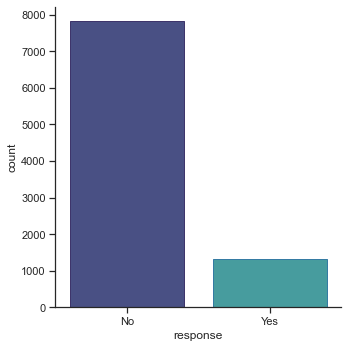

In [168]:
plot_data = pd.DataFrame(df['response'].value_counts())
plot_data = plot_data.reset_index()
plot_data.columns = ['response', 'count']

responses = (df['response'].value_counts()).to_dict()
x_values = responses.keys()
y_values = responses.values()
y_values
x_values

sns.set_theme(style="ticks")

sns.catplot(x="response", y="count", kind="bar", data = plot_data, palette="mako", edgecolor=sns.color_palette("mako", 3))


#### Response Rate

In [169]:
def calculate_response_rate (x, y = None): 
#y is optional. if not given, the function will group by all unique df[x] values
    
    df2 = pd.DataFrame(df['response'])
    df1 = pd.DataFrame(df[x])
    df_conc = pd.concat([df1, df2], axis = 1)     
    
    res_calc = [1 if df_conc['response'][i] == 'Yes' 
                else 0 for i in range(len(df_conc['response']))]    
    df_conc['res_calc'] =  pd.DataFrame(res_calc)   
    df_conc['rank'] = df_conc[x].rank(method='first')
    
    
    if y != None:
         
        df_conc['groups'] = pd.qcut(df_conc['rank'], y, precision = 0)    
        total_answ = df_conc.groupby('groups')['groups'].count()      
        yes_sum = (df_conc.groupby('groups')['res_calc'].sum()) 
   
    
    else:
        
        df_conc[x] = df_conc[x].astype(str) 
        total_answ = df_conc.groupby(x)[x].count() 
        yes_sum = (df_conc.groupby(x)['res_calc'].sum())         
        
    
    yes = [yes_sum[i] for i in range(len(yes_sum))]    
    groups = yes_sum.index.to_list()     
    total_answ = [total_answ[i] for i in range(len(total_answ))] 
    
    
    res_rate = list((np.array(yes)/np.array(total_answ))*100) 
    res_rate = [round(i, 2) for i in res_rate] 
    
    
    df_r = pd.DataFrame(res_rate)  
    df_gr = pd.DataFrame(groups)        
    df_res_rate = pd.concat([df_gr, df_r], axis = 1)    
    df_res_rate.columns = ['groups', 'response_rate_%'] 
                
    display(df_res_rate)
    return df_res_rate

def plot1_horizontal (df, title=""):
        sns.barplot(x='response_rate_%', y='groups', palette="mako", data = df).set(title=title)

def plot2_bar(df, title=""):
        sns.barplot(x='groups', y='response_rate_%', data = df, palette="mako").set(title=title)


#### 3.2.2 Response Rate per Sales Channel

,groups,response_rate_%
0,Agent,19.15
1,Branch,11.45
2,Call Center,10.88
3,Web,11.77


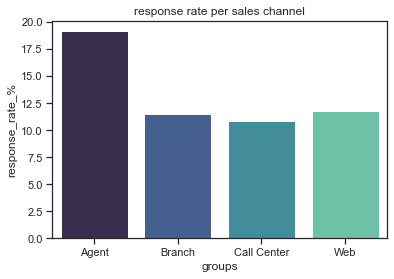

In [170]:
df1 = calculate_response_rate('sales_channel')
plot2_bar(df1, title= "response rate per sales channel")

#### 3.2.3 Response Rate per Total Claim Amount

,groups,response_rate_%
0,"(0.0, 914.0]",9.19
1,"(914.0, 1828.0]",9.86
2,"(1828.0, 2741.0]",9.97
3,"(2741.0, 3654.0]",18.93
4,"(3654.0, 4568.0]",15.77
5,"(4568.0, 5481.0]",15.77
6,"(5481.0, 6394.0]",19.15
7,"(6394.0, 7307.0]",19.61
8,"(7307.0, 8221.0]",13.80
9,"(8221.0, 9134.0]",11.16


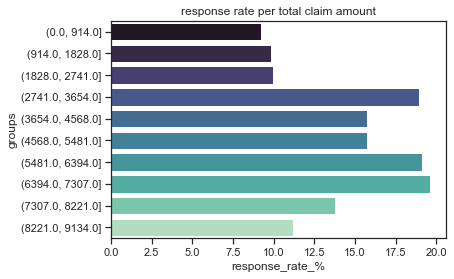

In [171]:
df2 = calculate_response_rate('total_claim_amount', 10)
plot1_horizontal(df2, title = "response rate per total claim amount")

#### 3.2.3 Response Rate per Income

,groups,response_rate_%
0,"(0.0, 914.0]",7.88
1,"(914.0, 1828.0]",9.64
2,"(1828.0, 2741.0]",17.96
3,"(2741.0, 3654.0]",22.65
4,"(3654.0, 4568.0]",14.79
5,"(4568.0, 5481.0]",14.79
6,"(5481.0, 6394.0]",10.94
7,"(6394.0, 7307.0]",17.63
8,"(7307.0, 8221.0]",15.77
9,"(8221.0, 9134.0]",11.16


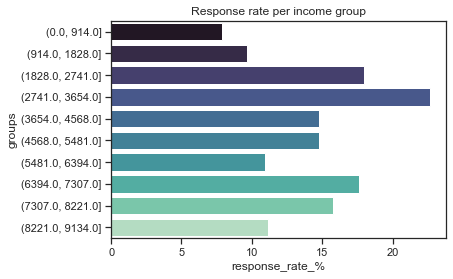

In [172]:
df_res_rate = calculate_response_rate ('income', 10) 
df_res_rate
plot1_horizontal(df_res_rate, title="Response rate per income group")

#### Response Rate per Education Level & State


##### Eduction Level 

,groups,response_rate_%
0,Bachelor,13.76
1,College,15.22
2,Doctor,17.54
3,High School or Below,13.04
4,Master,16.19


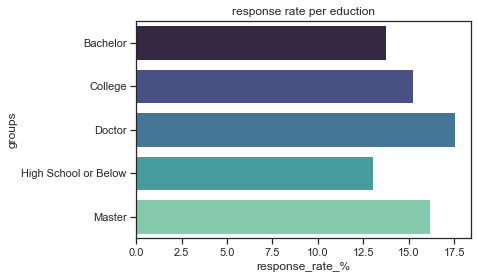

In [173]:
df_res_rate = calculate_response_rate ('education')
df_res_rate
plot1_horizontal(df_res_rate, title = "response rate per eduction")

##### per state

,groups,response_rate_%
0,Arizona,14.27
1,California,14.48
2,Nevada,14.06
3,Oregon,14.46
4,Washington,13.66


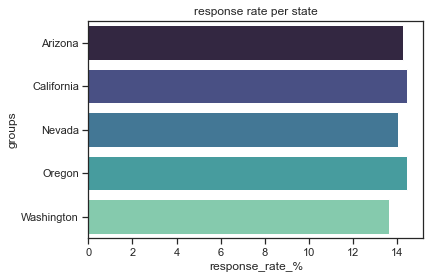

In [174]:
df_res_rate = calculate_response_rate ('state')
plot1_horizontal(df_res_rate, "response rate per state")

### 4. Distributions and Multicollinearity

#### 4.1 Deviding Data into Numerical and Categorical 

In [175]:
dfn = df.select_dtypes(include=np.number)
dfc = df.select_dtypes('object') 
dfn['customer_lifetime_value'] = round(dfn['customer_lifetime_value'], 2)


/var/folders/dj/n16zrnc50j79vq_pt7btwyg40000gn/T/ipykernel_31266/2824862546.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfn['customer_lifetime_value'] = round(dfn['customer_lifetime_value'], 2)


#### 4.2 Check the Normality of the Numerical Data

  - Distribution Plots with Seabron
  - Histograms with Matplotlib


##### 4.2.1 Distribution Plots with Seabron

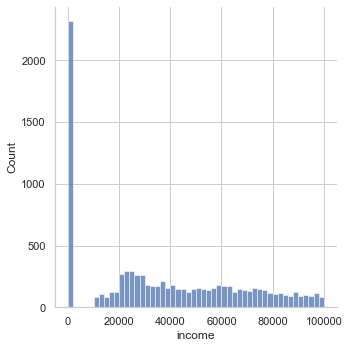

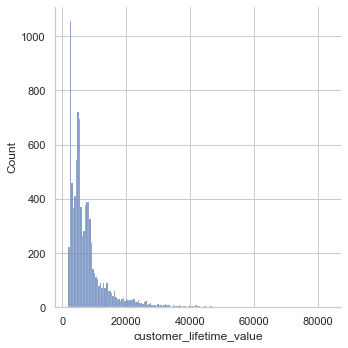

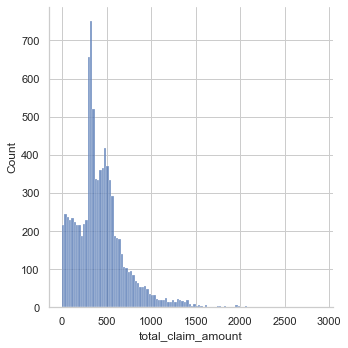

In [176]:
sns.set_style('whitegrid')

def distplot (col, bins = 20,):
        sns.distplot(df[col], kde = False, color ='red', bins = bins)
        return

ax1 = sns.displot(df['income'], bins = 50)
ax2 = sns.displot(df['customer_lifetime_value'])
ax3 = sns.displot(df['total_claim_amount'])

##### 4.2.2 Histograms with Matplotlib

Text(0.5, 1.0, 'total claim amount')

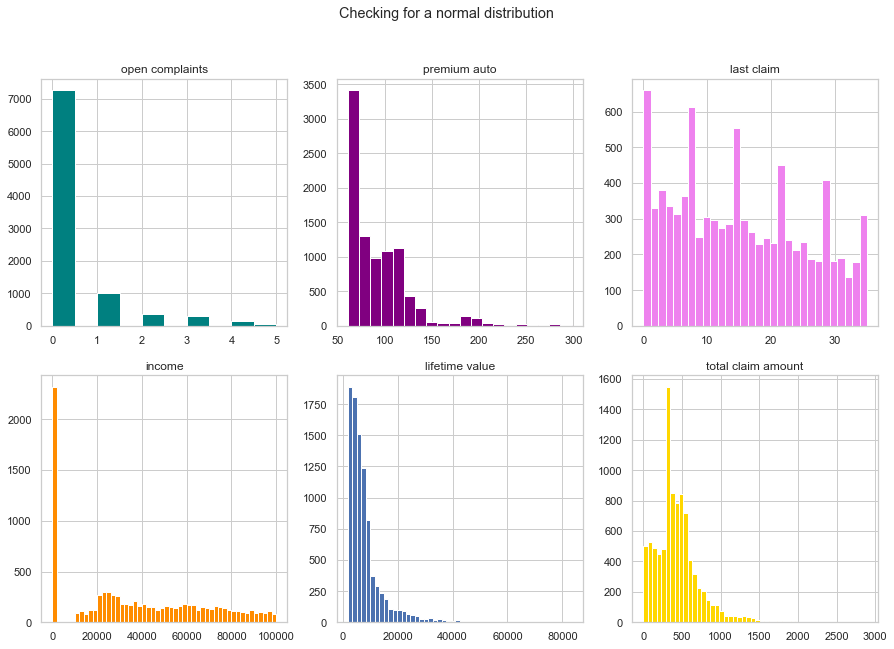

In [177]:
fig, ax = plt.subplots(2, 3, figsize=(15,10))

fig.suptitle('Checking for a normal distribution')

ax[0,0].hist(dfn['number_of_open_complaints'], color = 'teal')
ax[0,0].set_title('open complaints')
ax[0,1].hist(dfn['monthly_premium_auto'], color = 'purple', bins = 20)
ax[0,1].set_title('premium auto')
ax[0,2].hist(dfn['months_since_last_claim'], color = 'violet', bins = 30)
ax[0,2].set_title('last claim')
ax[1,0].hist(dfn['income'], color = 'darkorange', bins = 50)
ax[1,0].set_title('income')
ax[1,1].hist(dfn['customer_lifetime_value'], bins = 50)
ax[1,1].set_title('lifetime value')
ax[1,2].hist(dfn['total_claim_amount'], color = 'gold', bins = 50)
ax[1,2].set_title('total claim amount')

#### 4.3 Multicollinearity Between Numeric Features

**Result**: `Monthly Premium Auto` was considered for one Prediction Model and compared to the Model including all numerical values 

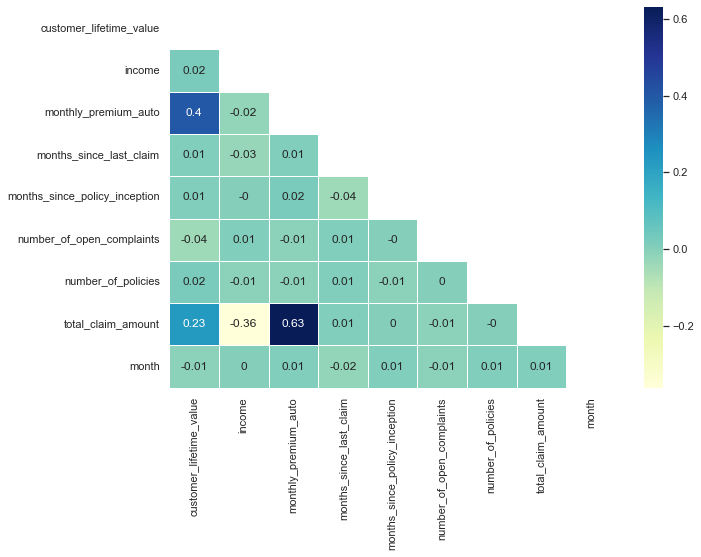

In [178]:
corr = round(dfn.corr(),2)

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize= (10,7))
ax = sns.heatmap(corr, annot=True, mask = mask, linewidths=.5, cmap='YlGnBu' )

#### 4.4 Droping Features with Cross Correlation above 0.9


In [179]:
upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype('bool'))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]

dfn.drop(to_drop, axis=1)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
0,2763.52,56274,69,32,5,0,1,384.811147,2
1,6979.54,0,94,13,42,0,8,1131.464935,1
2,12887.43,48767,108,18,38,0,2,566.472247,2
3,7645.86,0,106,18,65,0,7,529.881344,1
4,2813.69,43836,73,12,44,0,1,138.130879,2
...,...,...,...,...,...,...,...,...,...
9129,23405.99,71941,73,18,89,0,2,198.234764,2
9130,3096.51,21604,79,14,28,0,1,379.200000,2
9131,8163.89,0,85,9,37,3,2,790.784983,2
9132,7524.44,21941,96,34,3,0,3,691.200000,2


### 5. Data Processing

- Performing an X-y Split
- Normalizing and Transforming the Numeric Values
- One Hot/Label Encoding of Categorical Values
- Checking 
- Train-test split.
- Linear Regression
- Model Validation







#### 5.1 Train Test Split (X-y Split)

In [180]:
df_num = dfn.copy()
y = df_num['total_claim_amount']
X = df_num.drop(['total_claim_amount'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)


#### 5.2 Normalize and Transform Numerical Values

In [181]:
  
#Transforming customer_value & monthly_premium_auto

def log_transfom_clean(x):
    x = np.log10(x)
    if np.isfinite(x):
        return x
    else:
        return 0

# X['customer_lifetime_value'] = df_num['customer_lifetime_value'].apply(lambda x :log_transfom_clean(x))

X_train['monthly_premium_auto'] = X_train['monthly_premium_auto'].apply(lambda x :log_transfom_clean(x))
X_test['monthly_premium_auto'] = X_test['monthly_premium_auto'].apply(lambda x :log_transfom_clean(x))


#PowerTransform

pt = PowerTransformer()
pt.fit(X_train)

X_train_pt = pt.transform(X_train)
X_test_pt  = pt.transform(X_test)

#Normalization

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_pt_scaled = scaler.transform(X_train_pt)
X_test_pt_scaled = scaler.transform(X_test_pt)



/var/folders/dj/n16zrnc50j79vq_pt7btwyg40000gn/T/ipykernel_31266/76528301.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['monthly_premium_auto'] = X_train['monthly_premium_auto'].apply(lambda x :log_transfom_clean(x))
/var/folders/dj/n16zrnc50j79vq_pt7btwyg40000gn/T/ipykernel_31266/76528301.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['monthly_premium_auto'] = X_test['monthly_premium_auto'].apply(lambda x :log_transfom_clean(x))


#### 5.3 One Hot/Label Encoding Categorical Data

In [182]:
df_cat = dfc.copy()
df_cus = pd.DataFrame(df_cat['customer'])
df_ohe = df_cat.drop(['customer'], axis = 1)
intr   = df_num['total_claim_amount']

enc_list = list(df_ohe.columns)

def ohe (x):
    ohe = OneHotEncoder()    
    df = pd.DataFrame(ohe.fit_transform(df_ohe[[x]]).toarray())   
    df.columns = list(map(lambda y: y.replace('x0_', x + ': ').lower(), ohe.get_feature_names()))
    df = pd.concat([df, intr], axis = 1)
    return df                     

# concat all encoded 
df_ = pd.concat([ohe(i) for i in enc_list], axis = 1)
df_encoded = df_.drop(['total_claim_amount'], axis = 1)
df_encoded_customer = pd.concat([df_cus, df_encoded, ], axis = 1)
df_encoded_customer.head(2)


,customer,state: arizona,state: california,state: nevada,state: oregon,state: washington,response: no,response: yes,coverage: basic,coverage: extended,...,sales_channel: web,vehicle_class: four-door car,vehicle_class: luxury car,vehicle_class: luxury suv,vehicle_class: suv,vehicle_class: sports car,vehicle_class: two-door car,vehicle_size: large,vehicle_size: medsize,vehicle_size: small
0,BU79786,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,QZ44356,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


##### 5.3.1 HeatMap Matrix between Categorical and Dependend Variable

With the HeatMap and the privious OneHot Encoding I was checking   possible correlations between the categorical values with the Total Claim Amount. 

**Result**: I included only 2 heatmap expamples in the notebook. No variabel seems to correlation significantly with the Total Claim Amount. Therefore non of them are included in the Prediction Model. 

Index(['state', 'response', 'coverage', 'education', 'employmentstatus',
       'gender', 'location_code', 'marital_status', 'policy_type', 'policy',
       'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

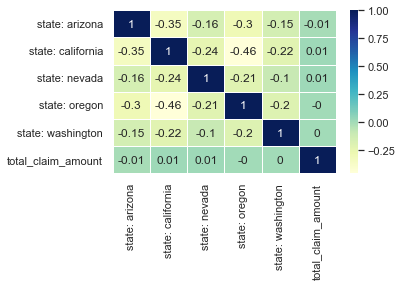

In [183]:
cross = ohe('state')
corr = round(cross.corr(),2) 

f, ax = plt.subplots(figsize= (5,3))
ax = sns.heatmap(corr, annot=True, linewidths=.5, cmap='YlGnBu' )

df_ohe.columns

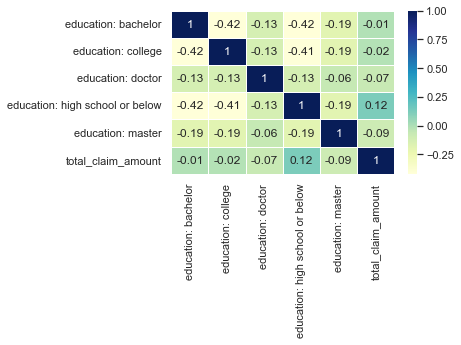

In [184]:
cross = ohe('education')
corr = round(cross.corr(),2) 

f, ax = plt.subplots(figsize= (5,3))
ax = sns.heatmap(corr, annot=True, linewidths=.5, cmap='YlGnBu')


### 6. Linear Regression Model

**2 Models where testet:** 

1) For the first model the dependend variabel `Monthly Premium Auto` was tested for its prediction strength.

2) For the second model all numerical values where tested for its prediction power


**Reminder**: Heatmap of Correlation Values can be found here: [Multicollinearity](#4.3-Multicollinearity-Between-Numeric-Features)


In [185]:
#Linear Regression with all the numerical variables as X

lm = LinearRegression()
lm = lm.fit(X_train_pt_scaled,y_train)
y_pred_train = lm.predict(X_train_pt_scaled)
y_pred_test = lm.predict(X_test_pt_scaled)

print('Model Validation: \n')

print("R2  training :", r2_score(y_train, y_pred_train))
print("MSE training :", mean_squared_error(y_train, y_pred_train))
print("RMSE training:", np.sqrt(mean_squared_error(y_train, y_pred_train)))
print("MAE training :", mean_absolute_error(y_train, y_pred_train))


print("------------------------")


print("R2 testing  :", r2_score(y_test, y_pred_test))
print("MSE testing :", mean_squared_error(y_test, y_pred_test))
print("RMSE testing:", np.sqrt(mean_squared_error(y_test, y_pred_test)))
print("MAE testing :", mean_absolute_error(y_test, y_pred_test))



Model Validation: 

R2  training : 0.43105974698212945
MSE training : 49099.66602734585
RMSE training: 221.58444446157733
MAE training : 155.29688029373767
------------------------
R2 testing  : 0.40499023992392236
MSE testing : 47502.017842696
RMSE testing: 217.94957637650043
MAE testing : 157.22651445288656


### 7. Result

In [186]:
y_train = pd.DataFrame(y_train)

results_train = y_train.copy()
results_train['y_pred'] = y_pred_train
results_train['residuals'] = results_train['total_claim_amount'] - results_train['y_pred']
results_train.head()

,total_claim_amount,y_pred,residuals
8720,331.200000,314.047310,17.152690
6092,393.600000,422.940929,-29.340929
1412,294.284951,164.712795,129.572156
4717,343.139611,546.981615,-203.842004
3725,1296.000000,902.151740,393.848260


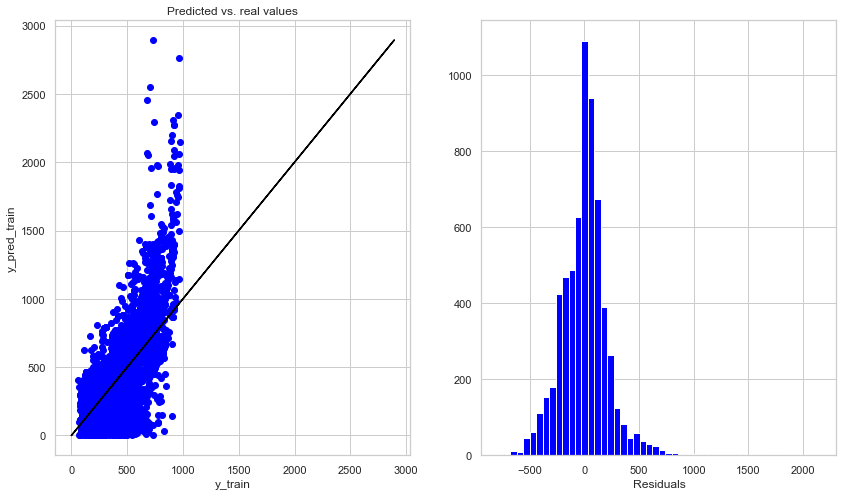

In [187]:
fig, axes = plt.subplots(1,2,figsize=(14,8))
axes[0].scatter(x=results_train['y_pred'], y=results_train['total_claim_amount'] , color = 'blue')
axes[0].plot(results_train['total_claim_amount'], results_train['total_claim_amount'], color = 'black')
axes[0].set_xlabel("y_train")
axes[0].set_ylabel("y_pred_train")
axes[0].set_title("Predicted vs. real values")
axes[1].hist(results_train['residuals'], color = "blue", bins = 50)
axes[1].set_xlabel("Residuals")
plt.show()

### Conclusion

- With the current data collected the Prediction Model is not accuratly predicting the dependend variable. 

**Further Data Collection and Data Exploration is recommendend**